# A detailed look at some of the SuSiE fits

In comparison with CAVIAR follow-ups; workflow implemented in [this notebook](20180704_MolecularQTL_Workflow.html).

In [1]:
%revisions -s -n 10

Revision,Author,Date,Message
ffae903,Gao Wang,2018-07-11,Update examples for new prior specification
e366938,Gao Wang,2018-07-11,Fix prior specification
432639f,Gao Wang,2018-07-10,Update documentation
18068e1,Gao Wang,2018-07-10,Remove unused code
c6f7916,Gao Wang,2018-07-10,Add ELBO check
00bb9fb,Gao Wang,2018-07-10,Add one more example for CAVIAR comparison
436ef8d,Gao Wang,2018-07-10,Improve CAVIAR comparison plot
9c851fe,Gao Wang,2018-07-09,Add more prior setting exploration
45a37a2,Gao Wang,2018-07-09,Add outlier case analysis example notebook


## Example 1

> /home/gaow/Documents/GIT/LargeFiles/JointLCL/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/CAVIAR_follow_up/chr11_63987798_63988488_clu_2010.CAVIAR.png (237.8 KiB):

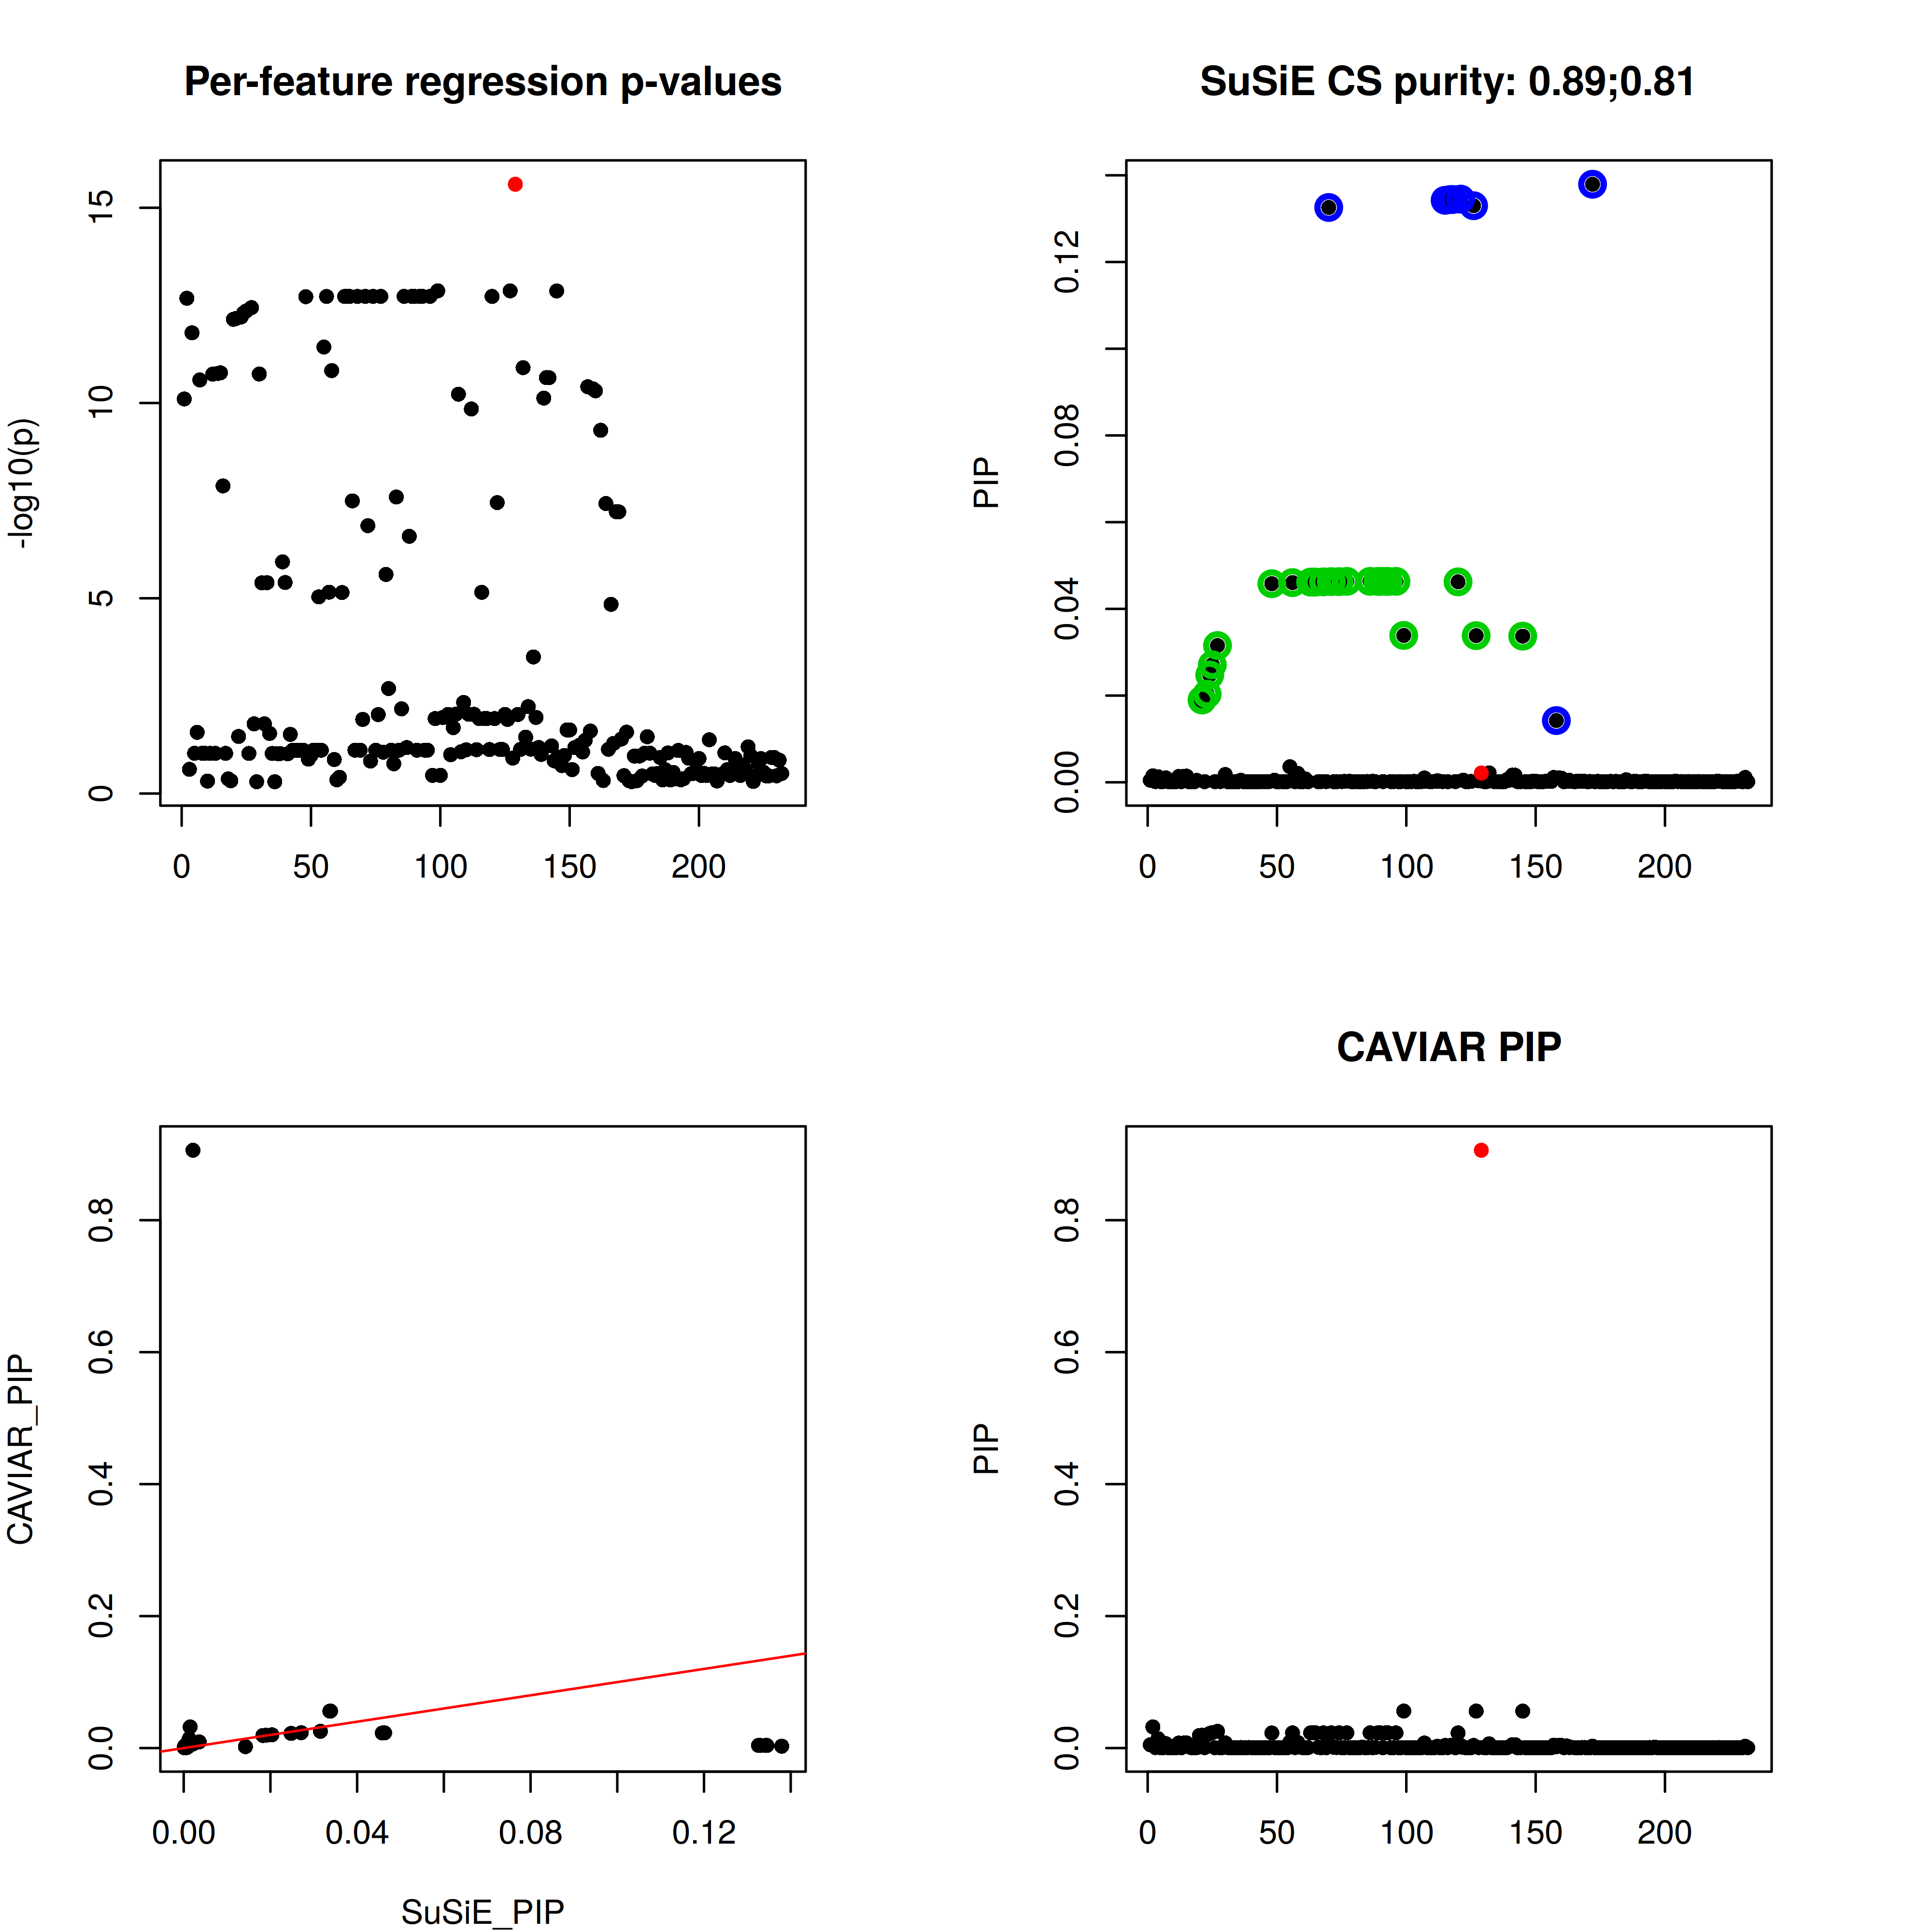

In [2]:
%preview /home/gaow/Documents/GIT/LargeFiles/JointLCL/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/CAVIAR_follow_up/chr11_63987798_63988488_clu_2010.CAVIAR.png

We trace back to its input data-set and see what is going on.

In [3]:
ls /home/gaow/Documents/GIT/LargeFiles/JointLCL/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/SuSiE_CS_*/chr11_63987798_63988488_clu_2010*

/home/gaow/Documents/GIT/LargeFiles/JointLCL/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/SuSiE_CS_2/chr11_63987798_63988488_clu_2010.log
/home/gaow/Documents/GIT/LargeFiles/JointLCL/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/SuSiE_CS_2/chr11_63987798_63988488_clu_2010.png
/home/gaow/Documents/GIT/LargeFiles/JointLCL/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/SuSiE_CS_2/chr11_63987798_63988488_clu_2010.rds


In [4]:
fn = "/home/gaow/Documents/GIT/LargeFiles/JointLCL/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/SuSiE_CS_2/chr11_63987798_63988488_clu_2010.rds"
susie = readRDS(fn)
dat = readRDS(susie$input)[[susie$idx]]
saveRDS(dat, "~/chr11_63987798_63988488_clu_2010_data.rds")

In [5]:
top_idx = which.max(abs(dat$z_score))
b = rep(0, length(dat$z_score))
b[top_idx] = 1

In [6]:
dat$pve

[1] 0.4363267

### Fit SuSiE with prior variance set to PVE estimate

In [7]:
library(susieR)
set.seed(1)
fitted = susie(dat$X, dat$y, L=5,
               estimate_residual_variance=TRUE, 
               prior_variance=dat$pve/(1-dat$pve),
               tol=1e-3, track_fit=TRUE)
sets = susie_get_CS(fitted,
            coverage = 0.95,
            X = dat$X, 
            min_abs_corr = 0.4)
pip = susie_get_PIP(fitted, sets$cs_index)

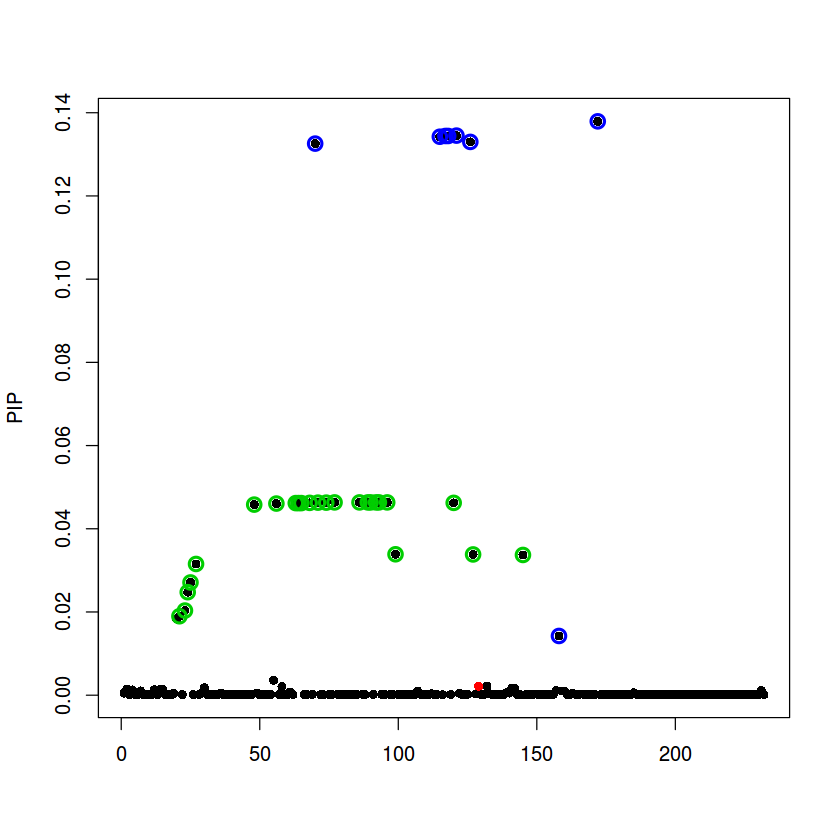

In [8]:
susie_pplot(pip, fitted = fitted, CS = sets, max_cs = 0.4, dtype='PIP',b=b)

To plot the fitting process:

In [9]:
susie_iterplot(fitted, 3, 'example_1')

Creating GIF animation ...
Iterplot saved to example_1.gif


> example_1.gif (241.0 KiB):

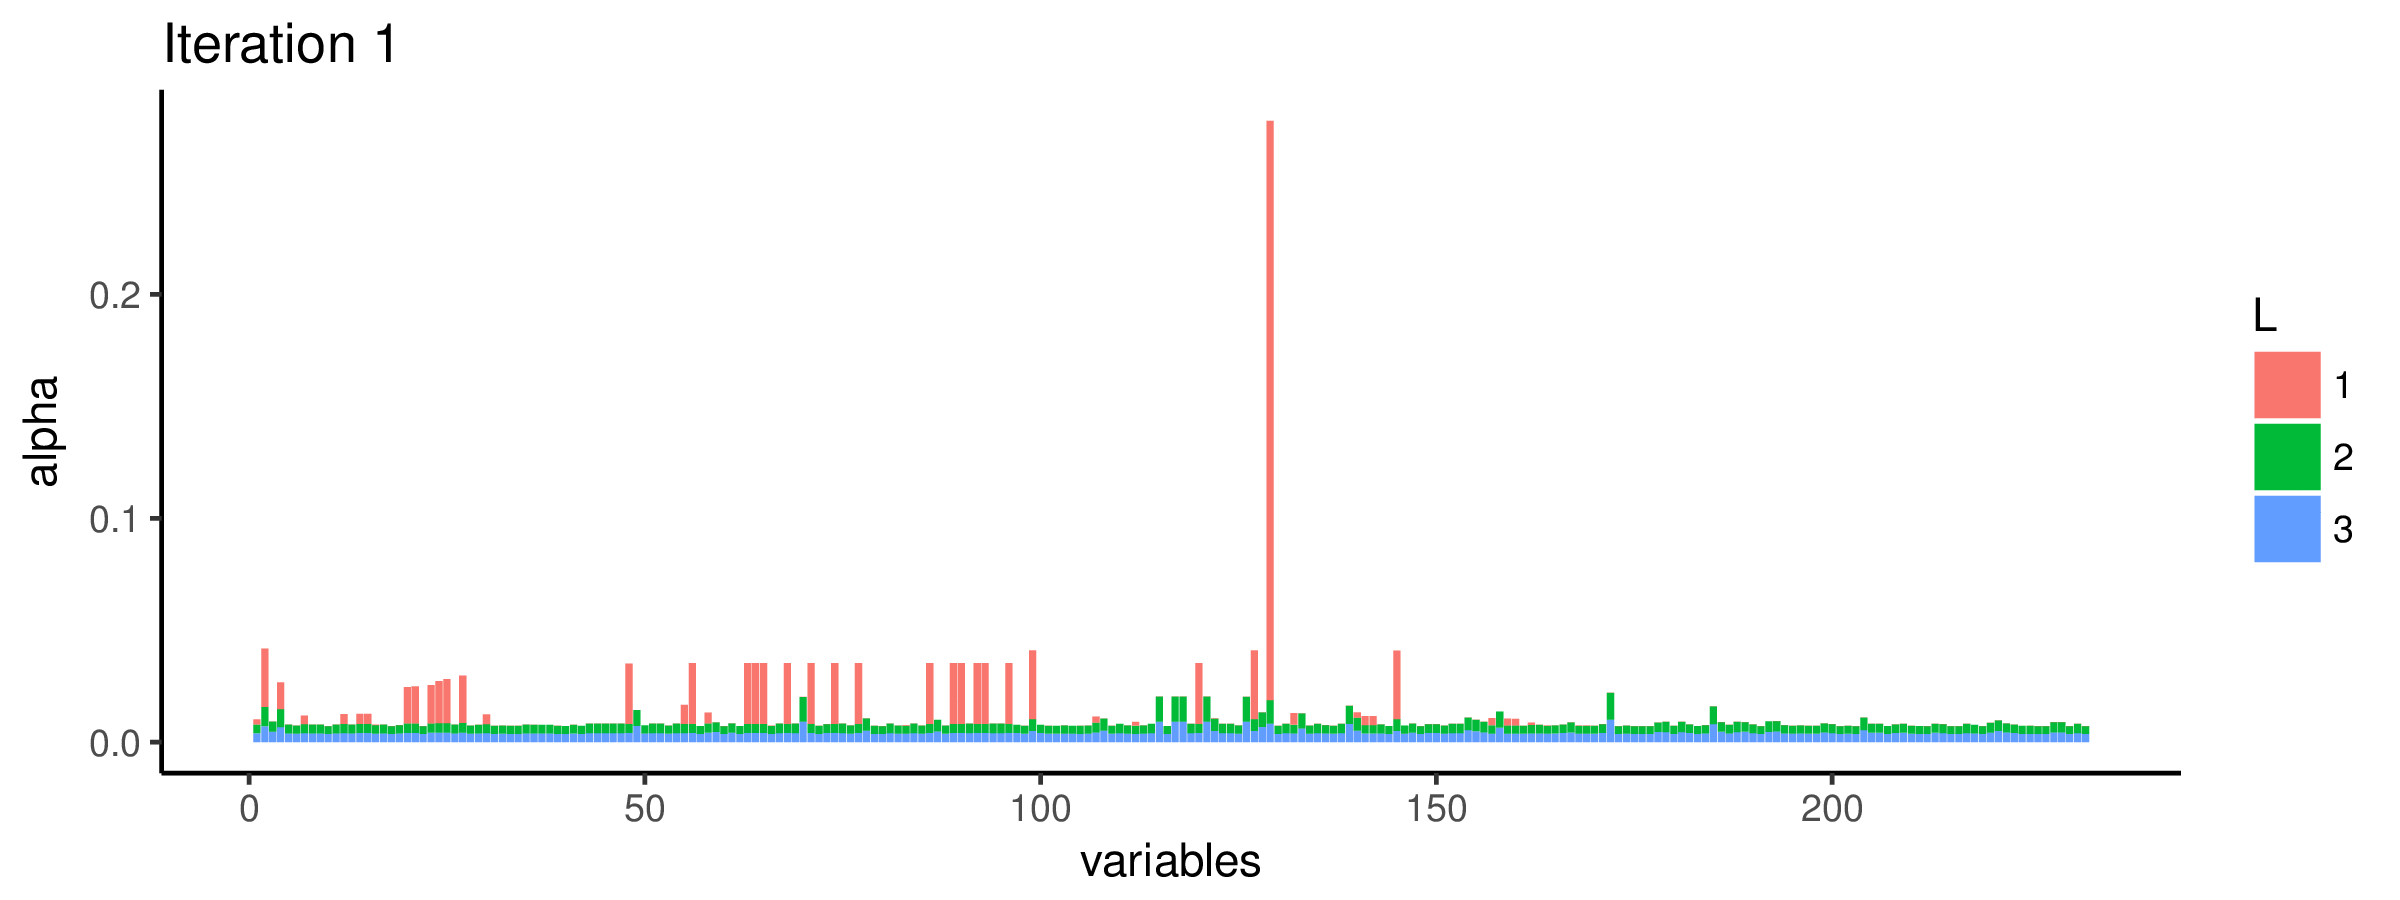

In [10]:
%preview example_1.gif

In [11]:
fitted$niter

[1] 9

In [12]:
fitted$elbo

[1]      -Inf -107.3547 -106.3830 -105.7769 -105.5700 -105.4328 -105.3949
 [8] -105.3858 -105.3835 -105.3831

However, if I set `L=2` as I did for CAVIAR (`-c 2`), the result is more consistent with CAVIAR.

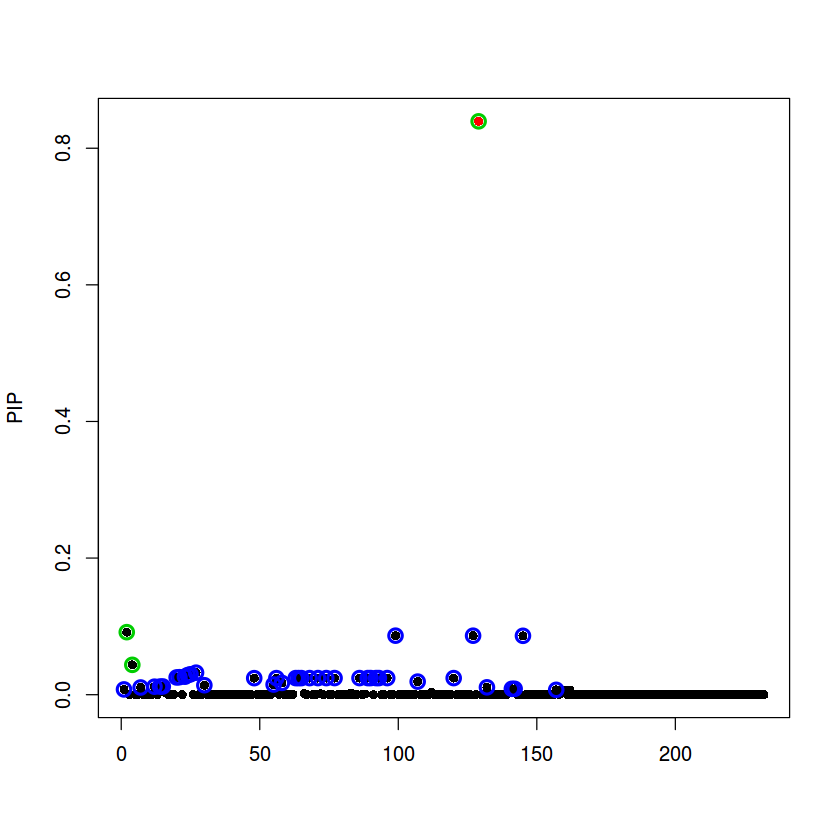

In [13]:
set.seed(1)
fitted = susie(dat$X, dat$y, L=2,
               estimate_residual_variance=TRUE, 
               prior_variance=dat$pve/(1-dat$pve),
               tol=1e-3, track_fit=TRUE)
sets = susie_get_CS(fitted,
            coverage = 0.95,
            X = dat$X, 
            min_abs_corr = 0.4)
pip = susie_get_PIP(fitted, sets$cs_index)
susie_pplot(pip, fitted = fitted, CS = sets, max_cs = 0.4, dtype='PIP',b=b)

In [12]:
fitted$niter

[1] 17

In [13]:
fitted$elbo

[1]       -Inf -100.79319 -100.53092 -100.44924 -100.30824 -100.19313
 [7] -100.10438 -100.02071  -99.92923  -99.83082  -99.74087  -99.67588
[13]  -99.63822  -99.61957  -99.61115  -99.60754  -99.60604  -99.60542

Takes longer to converge but the ELBO is bigger for `L=2`.

In [14]:
susie_iterplot(fitted, 3, 'example_1_l2')

Creating GIF animation ...
Iterplot saved to example_1_l2.gif


> example_1_l2.gif (196.1 KiB):

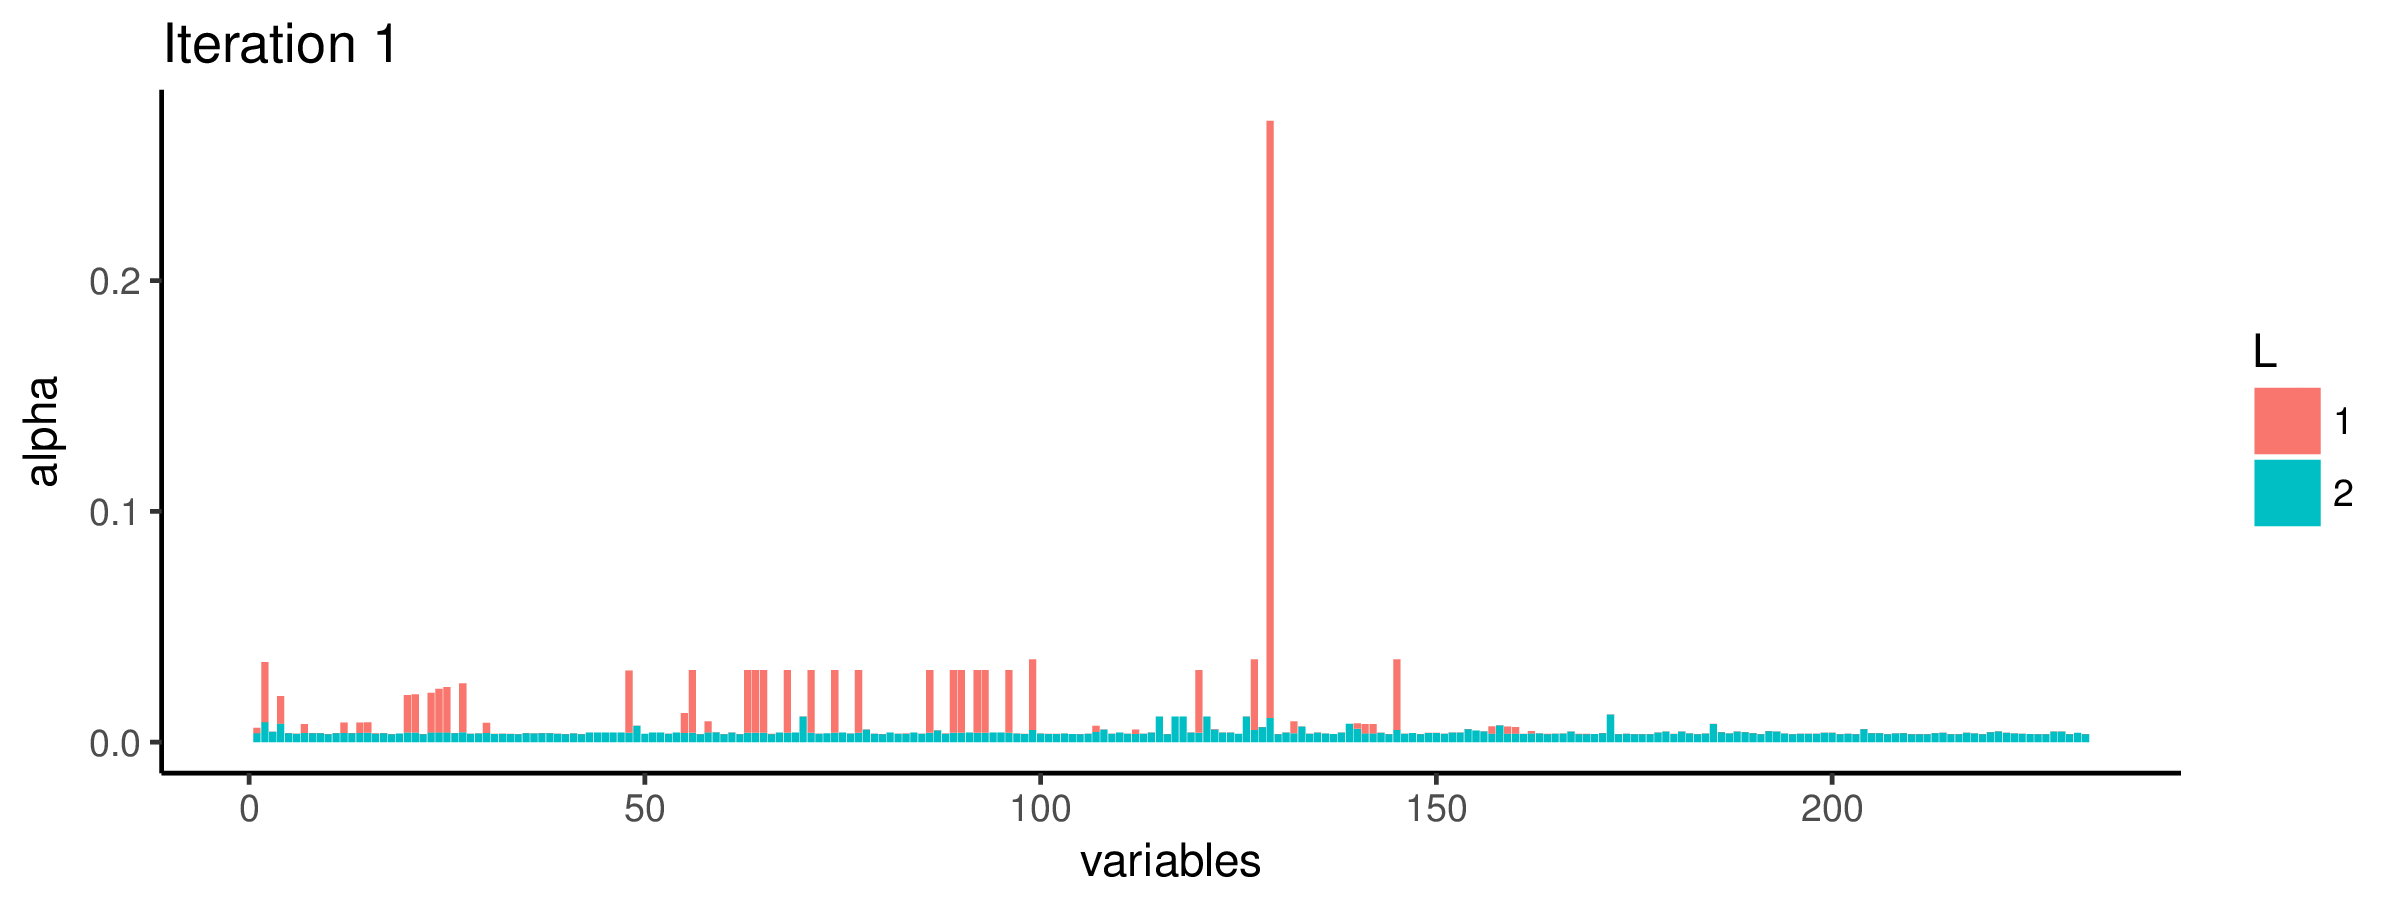

In [15]:
%preview example_1_l2.gif

## Example 2

> /home/gaow/Documents/GIT/LargeFiles/JointLCL/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/CAVIAR_follow_up/chr10_114186117_114186976_clu_3277.CAVIAR.png (230.1 KiB):

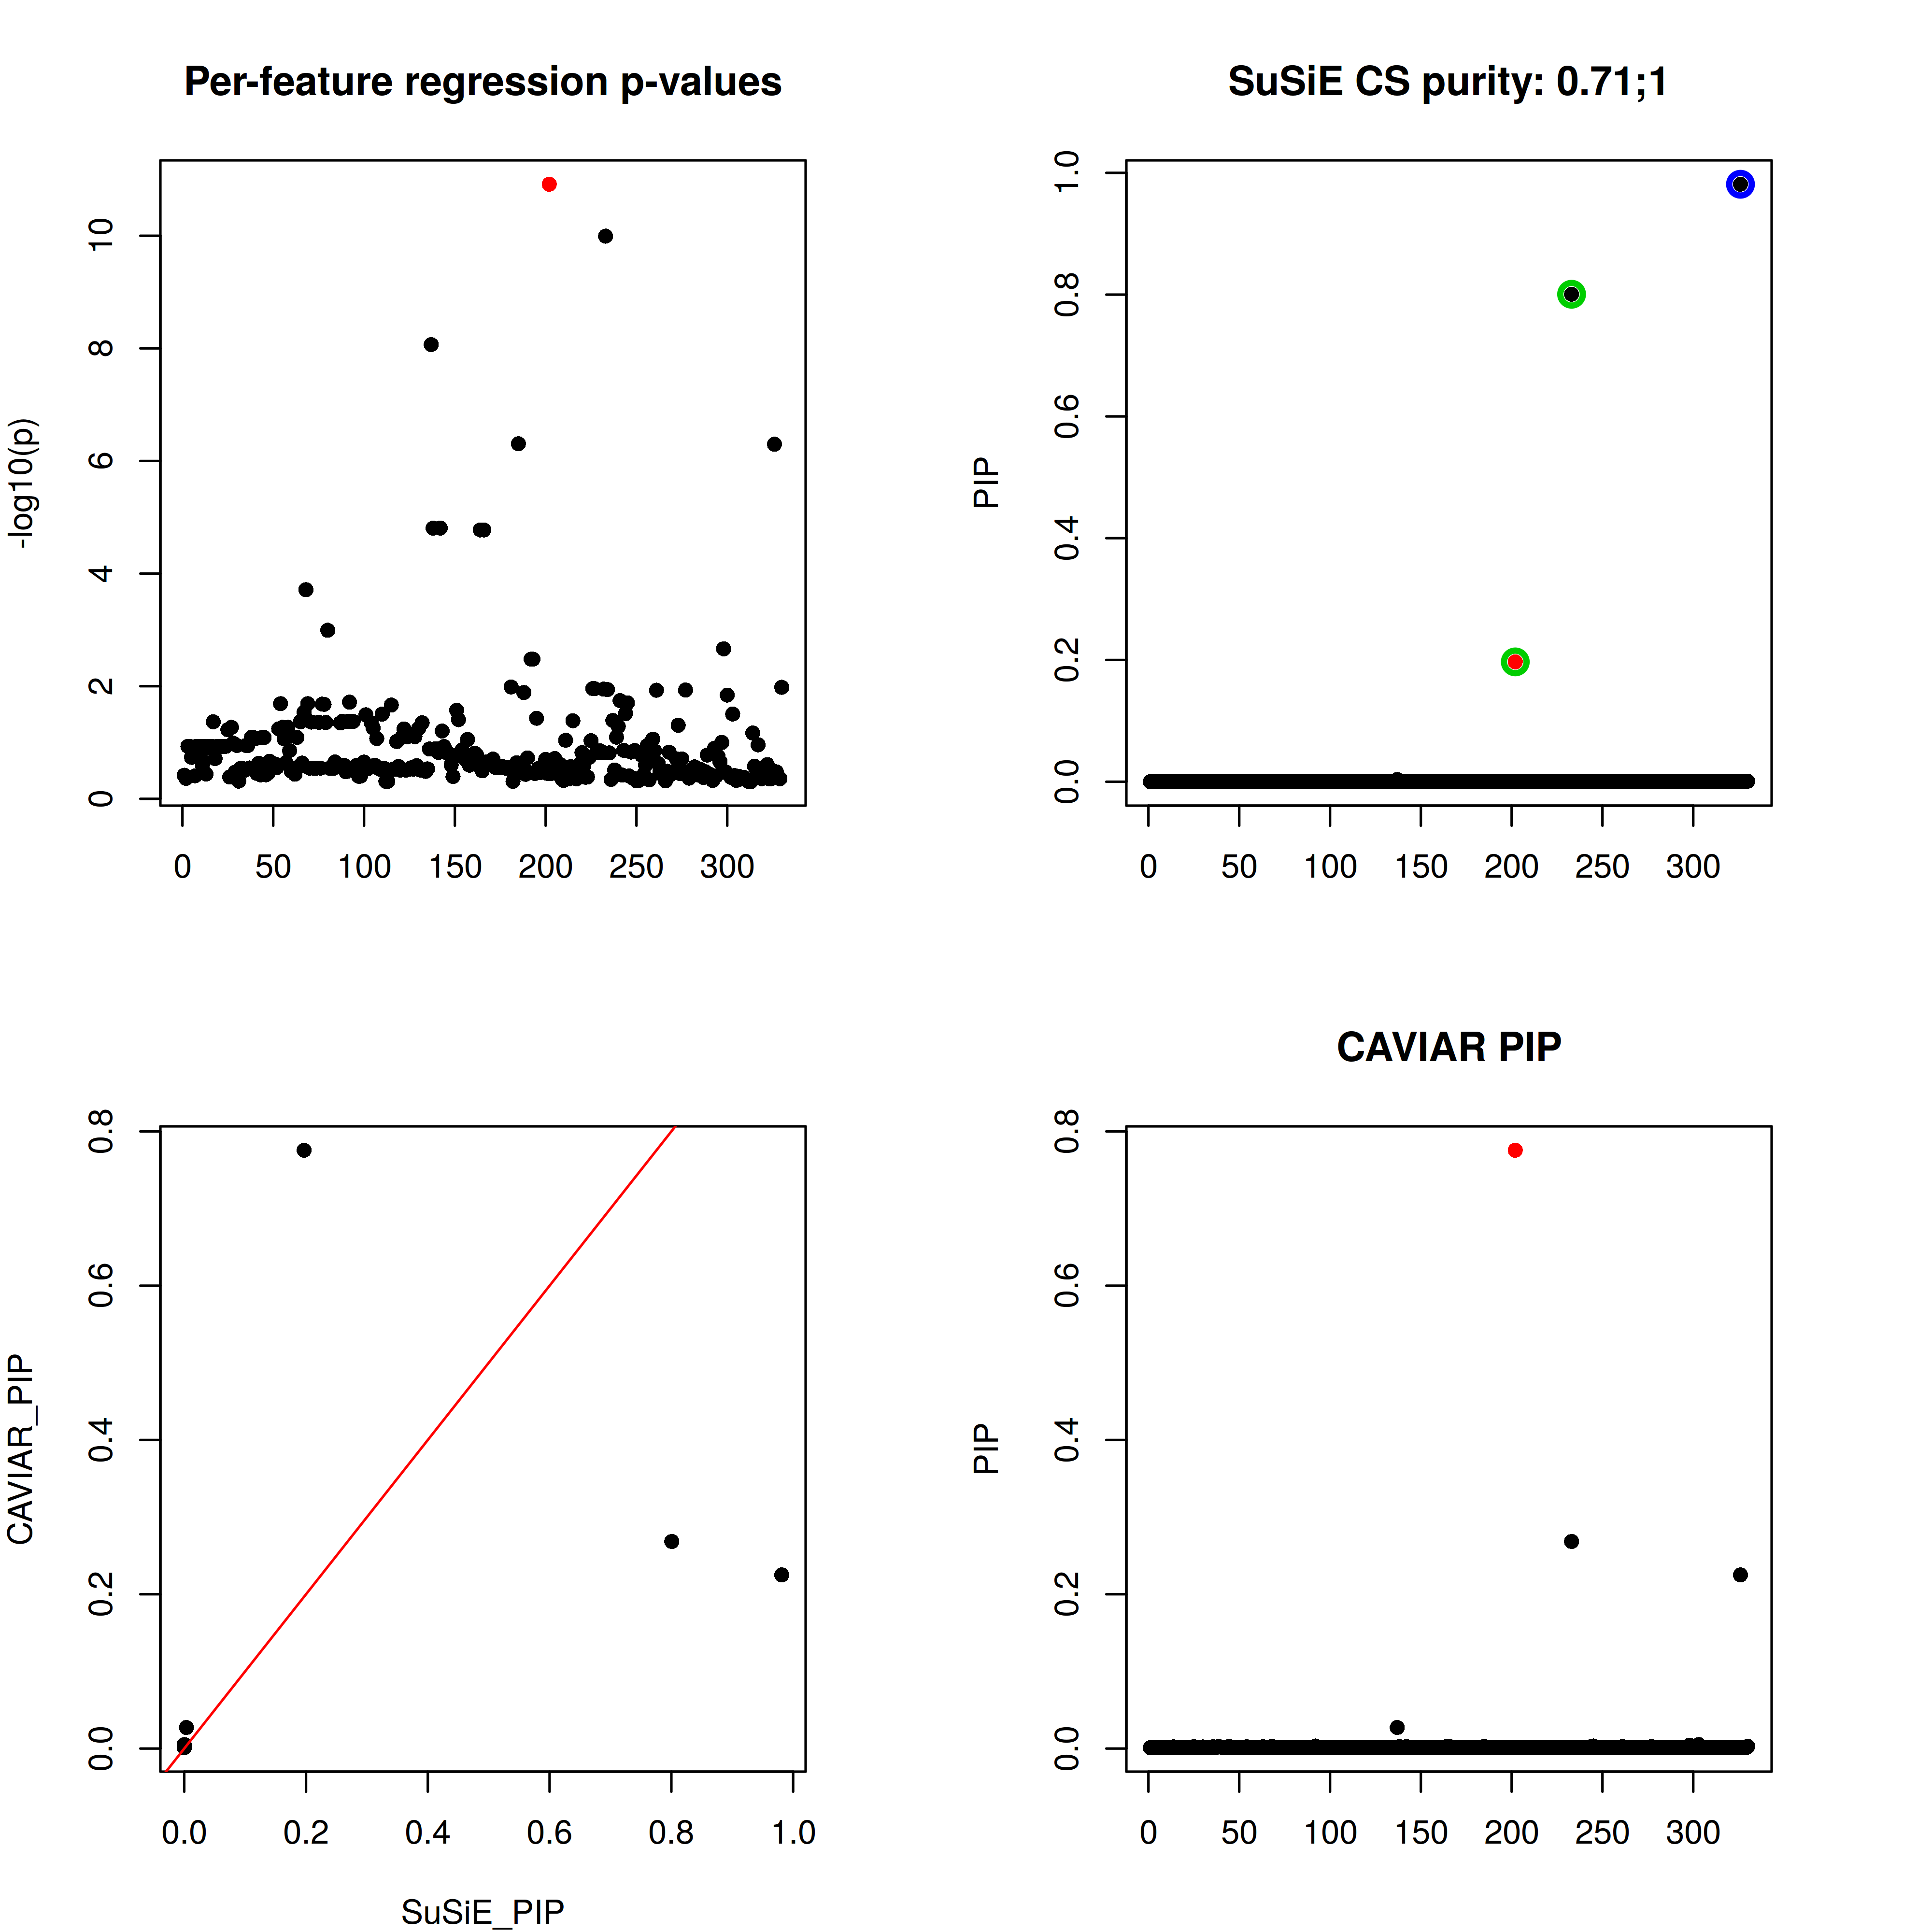

In [16]:
%preview /home/gaow/Documents/GIT/LargeFiles/JointLCL/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/CAVIAR_follow_up/chr10_114186117_114186976_clu_3277.CAVIAR.png

In [17]:
ls /home/gaow/Documents/GIT/LargeFiles/JointLCL/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/SuSiE_CS_*/chr10_114186117_114186976_clu_3277*

/home/gaow/Documents/GIT/LargeFiles/JointLCL/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/SuSiE_CS_2/chr10_114186117_114186976_clu_3277.log
/home/gaow/Documents/GIT/LargeFiles/JointLCL/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/SuSiE_CS_2/chr10_114186117_114186976_clu_3277.png
/home/gaow/Documents/GIT/LargeFiles/JointLCL/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/SuSiE_CS_2/chr10_114186117_114186976_clu_3277.rds


In [18]:
fn = "/home/gaow/Documents/GIT/LargeFiles/JointLCL/AS_output/fastqtl_qqnorm_ASintron_RNAseqGeuvadis_YangVCF_100Kb/SuSiE_CS_2/chr10_114186117_114186976_clu_3277.rds"
susie = readRDS(fn)
dat = readRDS(susie$input)[[susie$idx]]
saveRDS(dat, "~/chr10_114186117_114186976_clu_3277_data.rds")

In [19]:
top_idx = which.max(abs(dat$z_score))
b = rep(0, length(dat$z_score))
b[top_idx] = 1

In [20]:
dat$pve

[1] 0.3440634

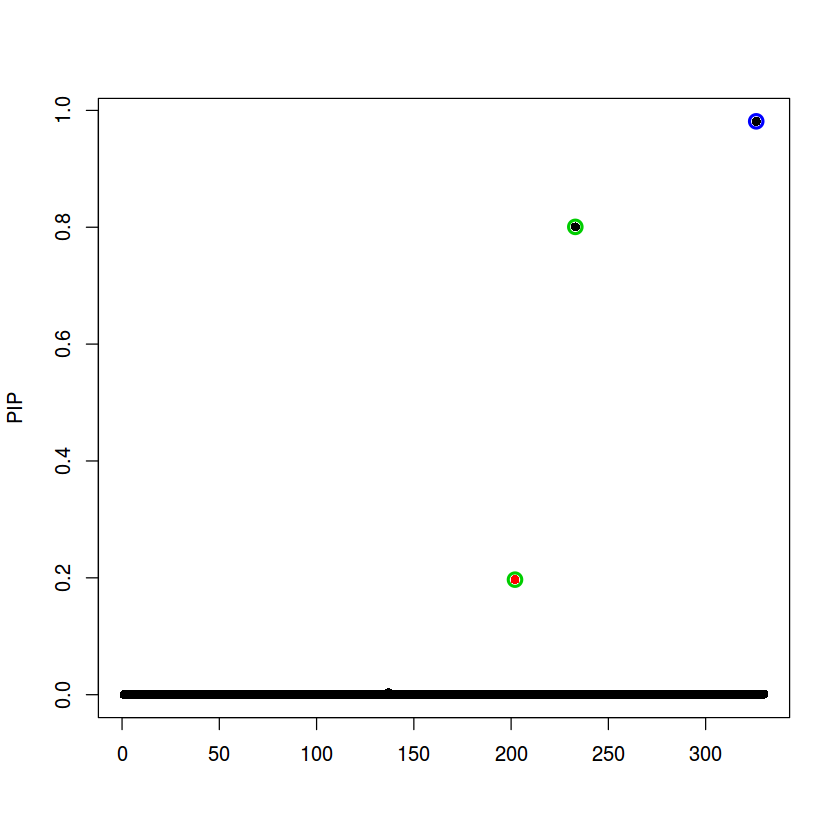

In [21]:
library(susieR)
set.seed(1)
fitted = susie(dat$X, dat$y, L=5,
               estimate_residual_variance=TRUE, 
               prior_variance=dat$pve/(1-dat$pve),
               tol=1e-3, track_fit=TRUE)
sets = susie_get_CS(fitted,
            coverage = 0.95,
            X = dat$X, 
            min_abs_corr = 0.4)
pip = susie_get_PIP(fitted, sets$cs_index)
susie_pplot(pip, fitted = fitted, CS = sets, max_cs = 0.4, dtype='PIP',b=b)

To track iterations:

In [22]:
susie_iterplot(fitted, 3, 'example_2')

Creating GIF animation ...
Iterplot saved to example_2.gif


> example_2.gif (102.9 KiB):

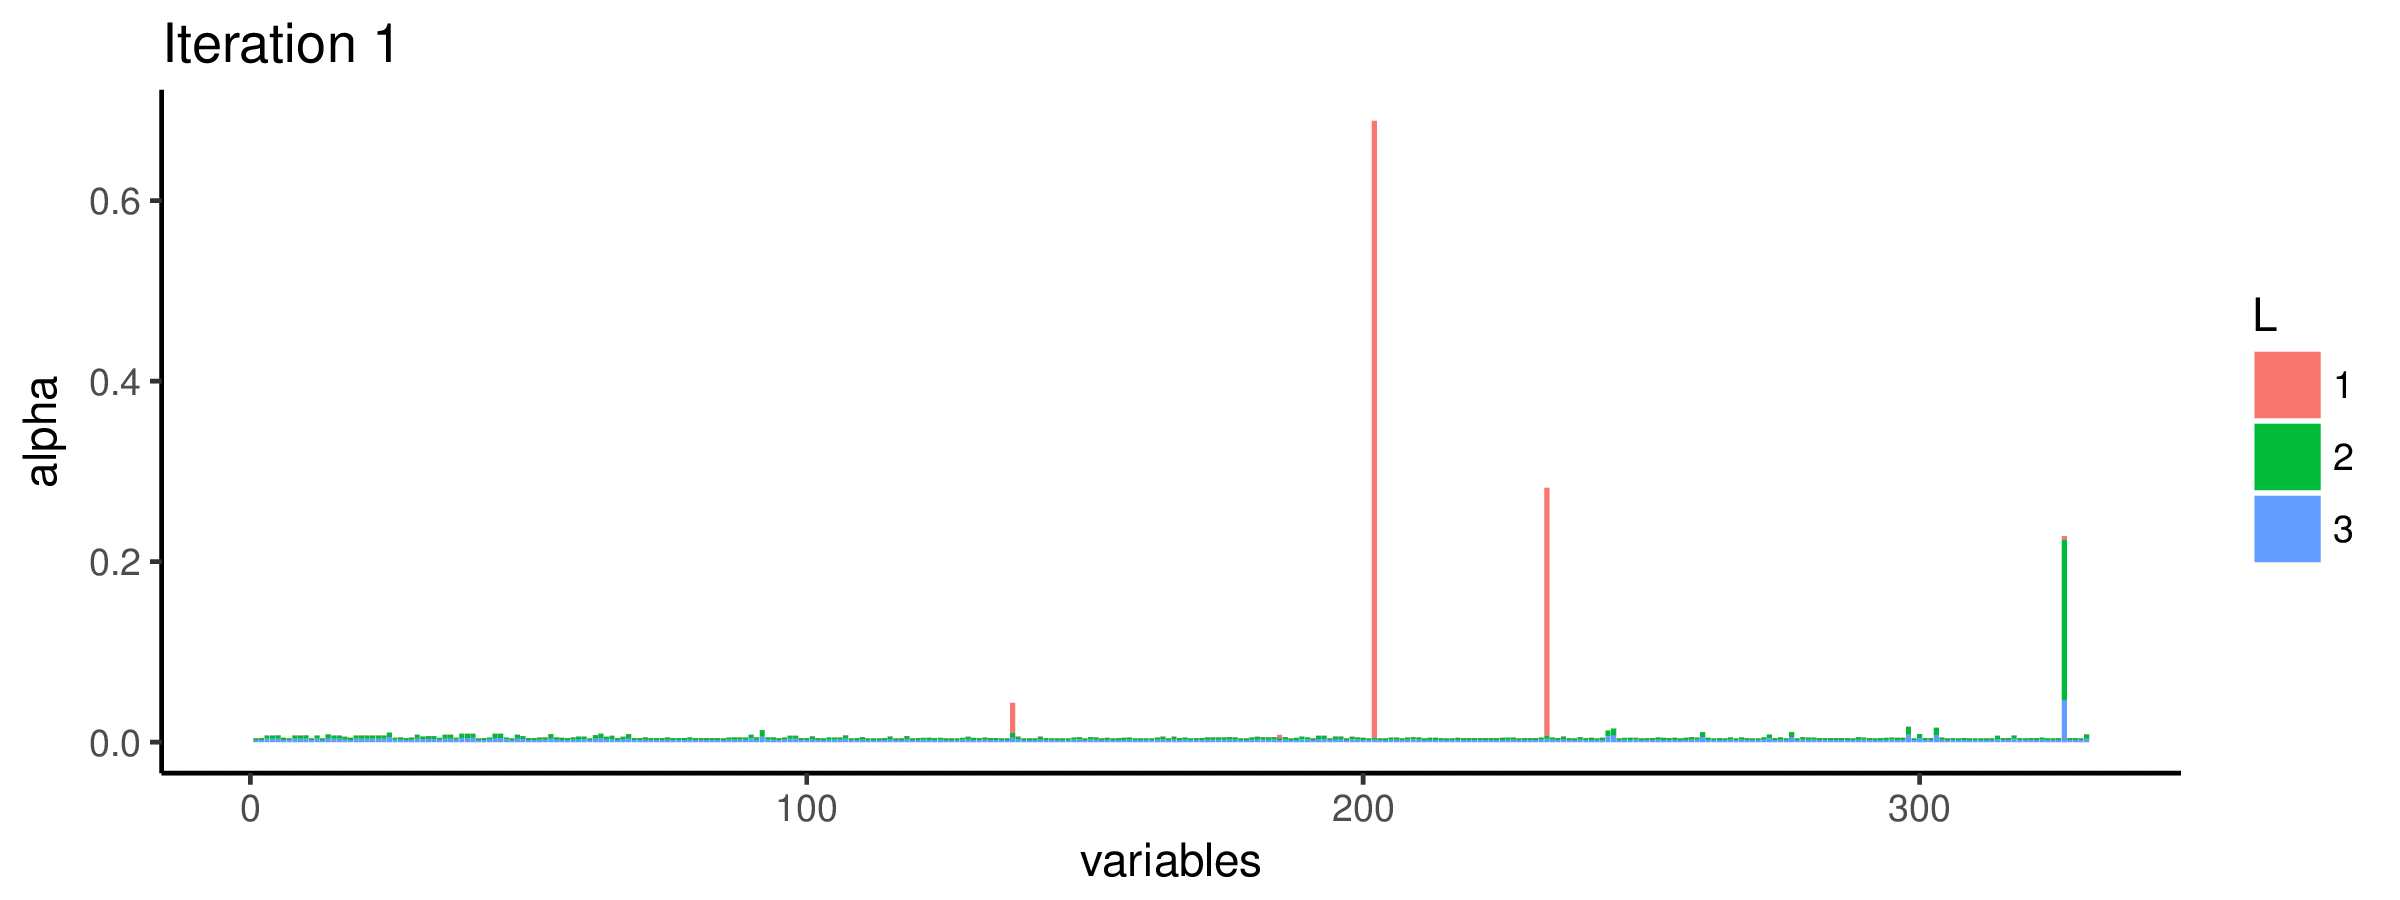

In [23]:
%preview example_2.gif

In [20]:
fitted$niter

[1] 8

In [21]:
fitted$elbo

[1]      -Inf -89.00714 -88.38428 -88.01729 -87.62732 -87.45170 -87.41207
[8] -87.40668 -87.40618

If I set `L=1`:

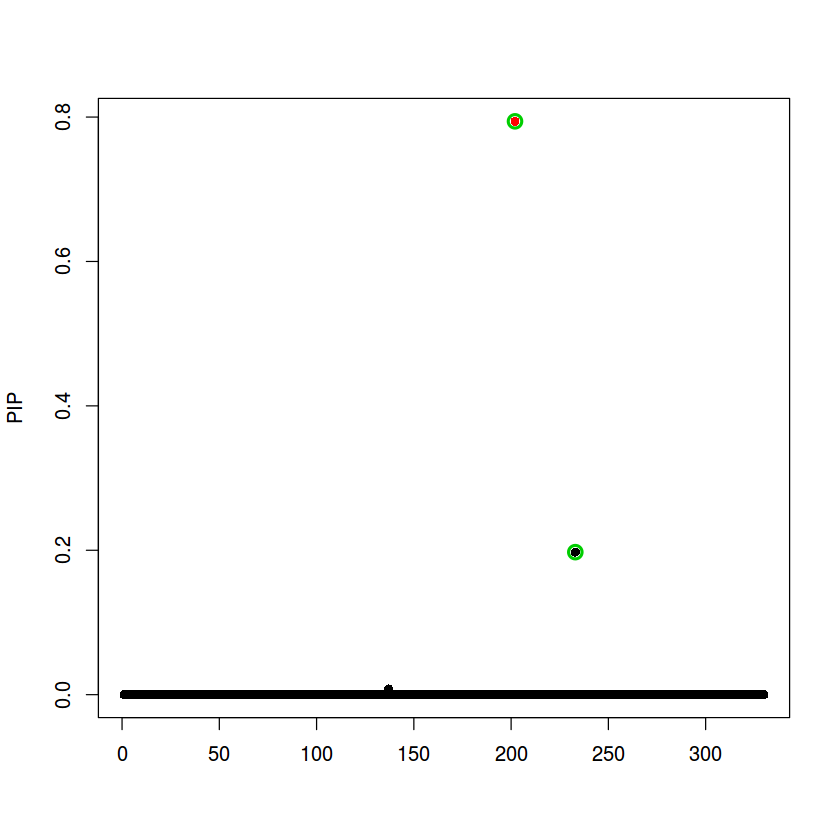

In [30]:
library(susieR)
set.seed(1)
fitted = susie(dat$X, dat$y, L=1,
               estimate_residual_variance=TRUE, 
               prior_variance=dat$pve/(1-dat$pve),
               tol=1e-3, track_fit=TRUE)
sets = susie_get_CS(fitted,
            coverage = 0.95,
            X = dat$X, 
            min_abs_corr = 0.4)
pip = susie_get_PIP(fitted, sets$cs_index)
susie_pplot(pip, fitted = fitted, CS = sets, max_cs = 0.4, dtype='PIP',b=b)

In [31]:
fitted$elbo

[1]      -Inf -82.50631 -82.39852 -82.39844

The ELBO here is in fact better.

In [33]:
susie_iterplot(fitted, 3, 'example_2_l1')

Creating GIF animation ...
Iterplot saved to example_2_l1.gif


> example_2_l1.gif (27.3 KiB):

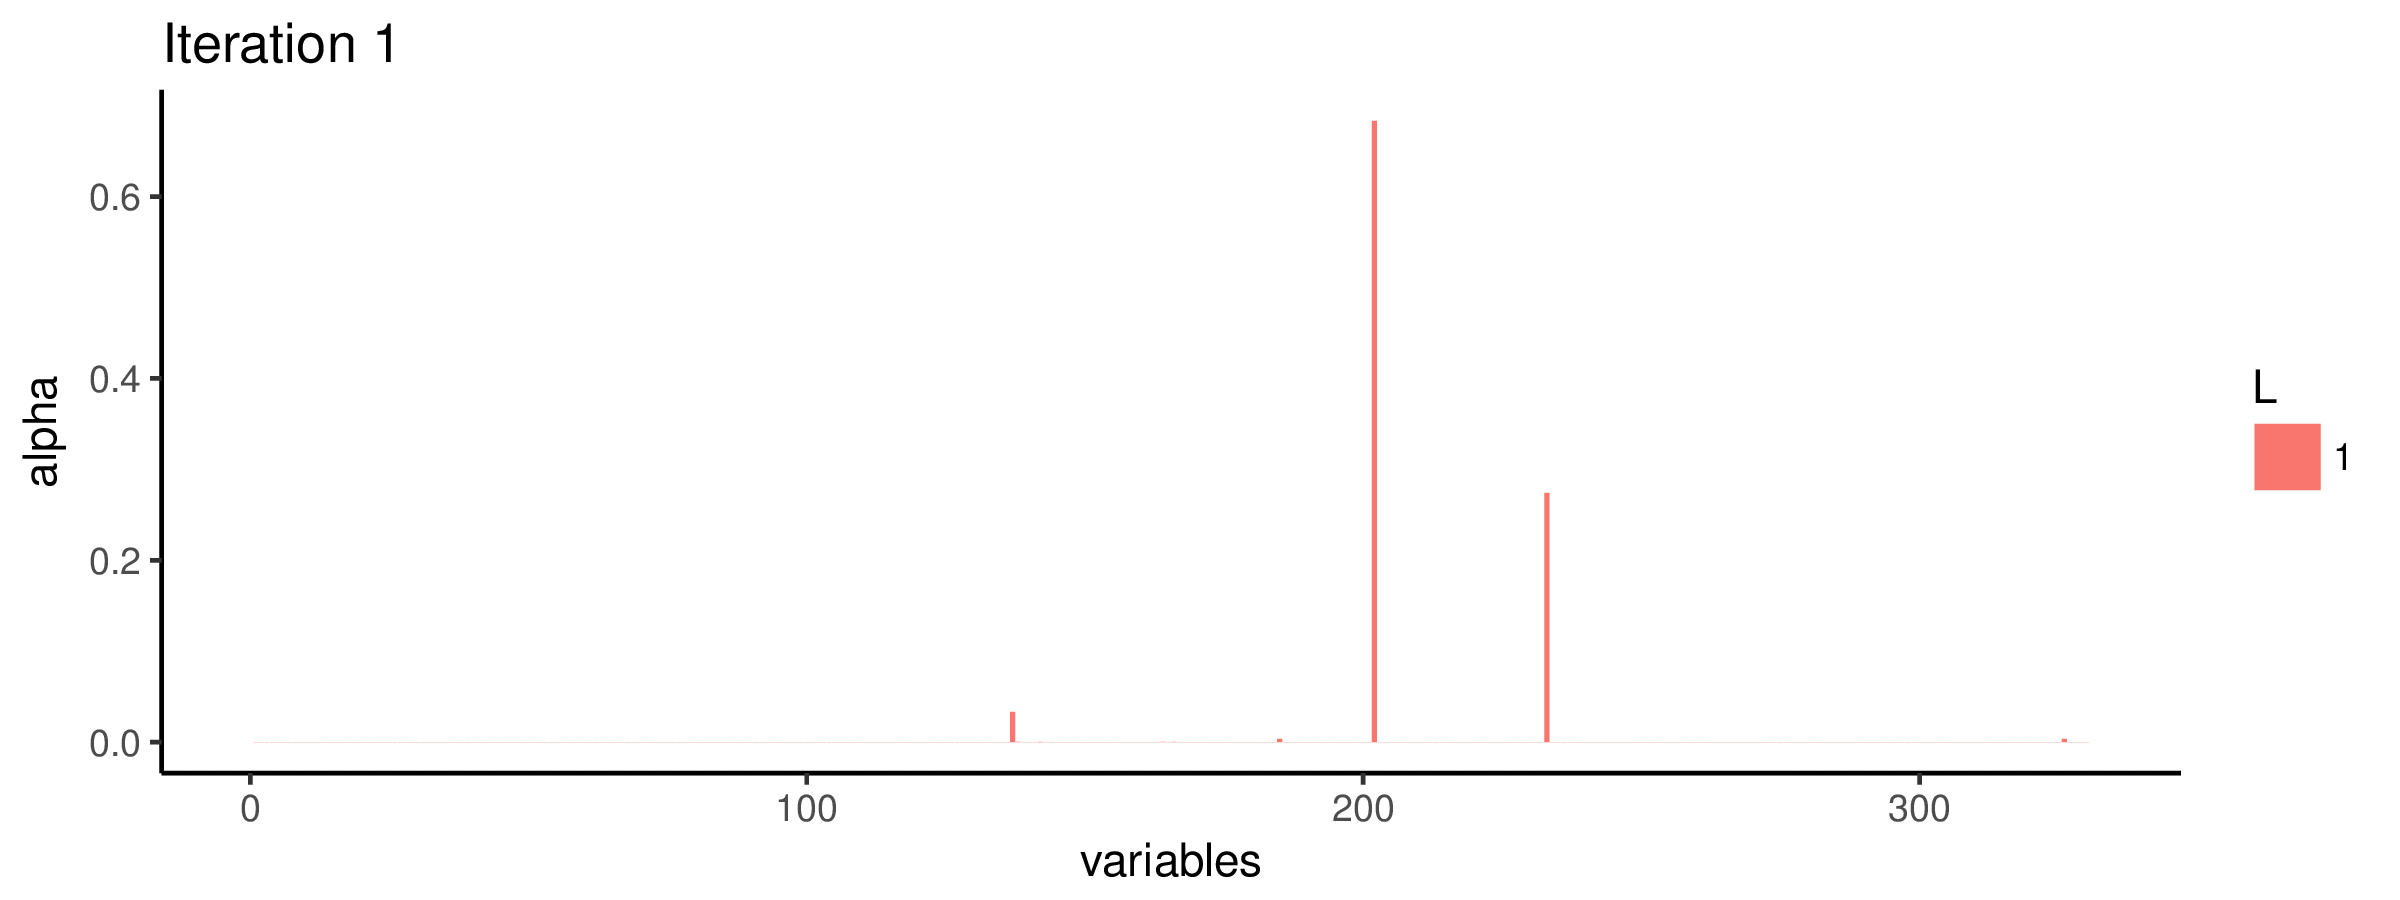

In [34]:
%preview example_2_l1.gif